In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df=pd.read_csv("Fraud_check.csv")
df.head()

Undergrad Marital.Status  ...  Work.Experience  Urban
0        NO         Single  ...               10    YES
1       YES       Divorced  ...               18    YES
2        NO        Married  ...               30    YES
3       YES         Single  ...               15    YES
4        NO        Married  ...               28     NO

[5 rows x 6 columns]

In [3]:
df.shape

(600, 6)

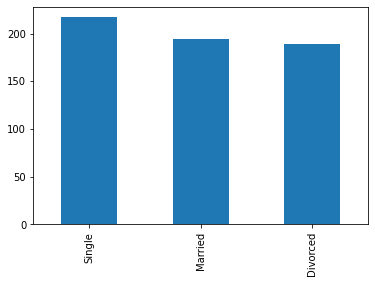

In [4]:
df["Marital.Status"].value_counts().plot.bar() #unique values #in data most of people belongs to single category. and count of married and divorced are almost same.

YES    302
NO     298
Name: Urban, dtype: int64


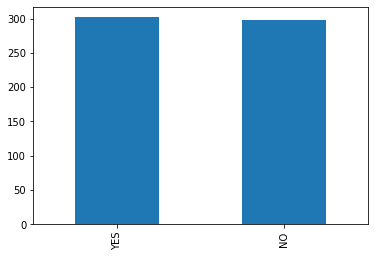

In [5]:
df["Urban"].value_counts().plot.bar()
print(df["Urban"].value_counts())     #count of is people belongs to urban area is almost same....which is 302 for yes and 298 for No.

YES    312
NO     288
Name: Undergrad, dtype: int64


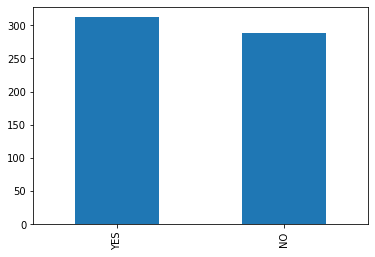

In [6]:
df["Undergrad"].value_counts().plot.bar()
print(df["Undergrad"].value_counts())       # We have 312 customer who is undergarduate where 288 customer are not undergraduate.

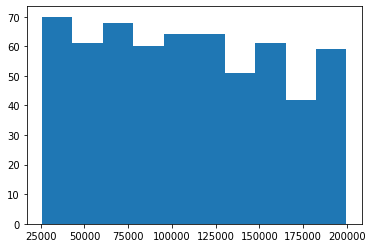

In [7]:
plt.hist(df["City.Population"])
plt.show()                            #Frequency distribution of city population of customer from where they belong.

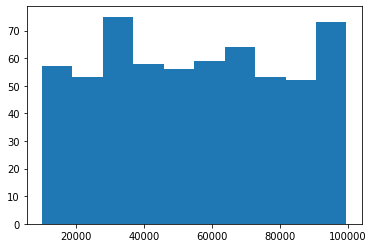

In [8]:
plt.hist(df["Taxable.Income"])
plt.show()                                #Min amount in which they(customer) have to pay tax.

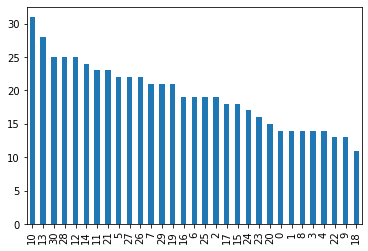

In [9]:
df["Work.Experience"].value_counts().plot.bar()
plt.show()                                      #we have more than 30 customer who have 10 years work experiance.

In [10]:
df.isna().sum() #no null values 

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

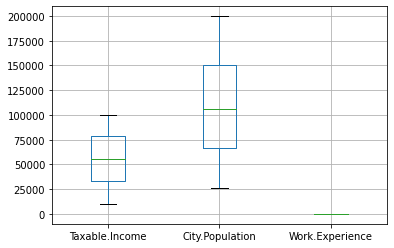

In [11]:
df.boxplot()

Converting data into risk and non risk data basis of taxable income

In [12]:
df["fraud"]=np.where(df["Taxable.Income"]<=30000,1,0)  # 0 is for good and 1 for risky
df  

Undergrad Marital.Status  Taxable.Income  ...  Work.Experience  Urban fraud
0          NO         Single           68833  ...               10    YES     0
1         YES       Divorced           33700  ...               18    YES     0
2          NO        Married           36925  ...               30    YES     0
3         YES         Single           50190  ...               15    YES     0
4          NO        Married           81002  ...               28     NO     0
..        ...            ...             ...  ...              ...    ...   ...
595       YES       Divorced           76340  ...                7    YES     0
596       YES       Divorced           69967  ...                2    YES     0
597        NO       Divorced           47334  ...                0    YES     0
598       YES        Married           98592  ...               17     NO     0
599        NO       Divorced           96519  ...               16     NO     0

[600 rows x 7 columns]

#Preprocessing Data
converting categorical data into numerical form

In [13]:
le=preprocessing.LabelEncoder()
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])
df["Urban"]=le.fit_transform(df["Urban"])

In [14]:
#dropping taxceble income 
df.drop(columns="Taxable.Income",inplace=True)

In [15]:
x=df.iloc[:,0:5].values
y=df["fraud"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40)

In [17]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 110
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [18]:
pre=model.predict(x_test)

In [19]:
print(np.round(np.mean(pre==y_test)*100,2),"%")

72.22 %


#Using grid search for hyperparameter tunning

In [20]:
from sklearn.model_selection import GridSearchCV
n = np.array(range(1,6))
m = np.array(np.arange(100,201,5))
param_grid = dict(n_estimators = m,max_features = n)
param_grid

{'max_features': array([1, 2, 3, 4, 5]),
 'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
        165, 170, 175, 180, 185, 190, 195, 200])}

In [21]:
model1=RandomForestClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200])})

In [22]:
print(grid.best_score_)
print(grid.best_params_)     

0.7712654320987654
{'max_features': 2, 'n_estimators': 110}


##Using optained value for building model

In [23]:
values=list(grid.best_params_.values())


In [24]:
num_trees2 = values[1]  #Using best parameter
max_features2 = values[0] 
model2 = RandomForestClassifier(n_estimators=num_trees2, max_features=max_features2 )
model2.fit(x_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=110)

In [25]:
pre2=model2.predict(x_test)

In [26]:
print(np.round(np.mean(pre2==y_test)*100,2),"%")

71.72 %
